# Restaurant Location Recommender in Toronto, Ontorio, Canada

## Importing required libraries

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## WebScrapping demographics

In [2]:
import urllib.request

url = "https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"
page = urllib.request.urlopen(url) 

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")

In [6]:
toronto_table=soup.find('table', class_='wikitable sortable')
toronto_table

<table border="1" cellpadding="5" cellspacing="0" class="wikitable sortable">
<tbody><tr>
<th width="20%">Name
</th>
<th width="5%">FM
</th>
<th width="20%">Census Tracts
</th>
<th width="5%">Population
</th>
<th width="5%">Land area (km2)
</th>
<th width="5%">Density (people/km2)
</th>
<th width="5%">% Change in Population since 2001
</th>
<th width="5%">Average Income
</th>
<th width="5%">Transit Commuting %
</th>
<th width="5%">% Renters
</th>
<th width="10%">Second most common language (after English) by name
</th>
<th width="10%">Second most common language (after English) by percentage
</th>
<th width="10%">Map
</th></tr>
<tr>
<td><b>Toronto <a class="mw-redirect" href="/wiki/Census_metropolitan_area" title="Census metropolitan area">CMA</a> Average</b>
</td>
<td>
</td>
<td>All
</td>
<td><b>5,113,149</b>
</td>
<td><b>5903.63</b>
</td>
<td><b>866</b>
</td>
<td><b>9.0</b>
</td>
<td><b>40,704</b>
</td>
<td><b>10.6</b>
</td>
<td><b>11.4</b>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>

In [7]:
population=[]
neighborhood=[]
density=[]


for row in toronto_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==13:
        a=cells[0].find(text=True)
        a=a[:]
        neighborhood.append(a)
        b=cells[3].find(text=True)
        b=b[:-1]
        population.append(b)
        c=cells[5].find(text=True)
        c=c[:-1]
        density.append(c)

In [8]:
df = pd.DataFrame(neighborhood,columns=['Neighborhood'])

In [9]:
df['Population'] = population
df['density'] = density
df

,Neighborhood,Population,density
0,Toronto,"5,113,14",86
1,Agincourt,"44,577",3580
2,Alderwood,"11,656",2360
3,Alexandra Park,"4,355","13,609"
4,Allenby,"2,513",4333
5,Amesbury,"17,318","4,934"
6,Armour Heights,"4,384",1914
7,Banbury,"6,641",2442
8,Bathurst Manor,"14,945",3187
9,Bay Street Corridor,"4,787","43,518"


In [10]:
df.drop(df.index[0],inplace=True)

In [12]:
df.reset_index(drop=True,inplace=True)

## Webscrapping Postal Codes

In [14]:
url2 = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page2 = urllib.request.urlopen(url2)
soup2 = BeautifulSoup(page2, "lxml")
toronto_table2=soup2.find('table', class_='wikitable sortable')
toronto_table2

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>East Y

In [15]:
postal_code=[]
borough=[]
neighborhood=[]


for row in toronto_table2.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        a=cells[0].find(text=True)
        a=a[:-1]
        postal_code.append(a)
        b=cells[1].find(text=True)
        b=b[:-1]
        borough.append(b)
        c=cells[2].find(text=True)
        c=c[:-1]
        neighborhood.append(c)

df2 = pd.DataFrame(postal_code,columns=['PostalCode'])
df2['Borough'] = borough
df2['Neighborhood'] = neighborhood

In [17]:
df2.drop(df2[df2['Borough']=='Not assigned'].index,inplace=True)

for i in range(103):
    if(df2.iloc[i,2]=='Not assigned'):
        df2.iloc[i,2] = df2.iloc[i,1]
        
df2.reset_index(drop=True, inplace=True)

In [20]:
df2.shape

(103, 3)

In [21]:
area=[]
for i in range(174):
    area.append(0.0)
df['Area']=area

In [23]:
for i in range(174):
    df.iloc[i,3]=float(df.iloc[i,1].replace(',',''))/float(df.iloc[i,2].replace(',',''))

In [25]:
population=[]
area=[]
density=[]

for i in range(103):
    population.append(0)
    area.append(0.0)
    density.append(0)
    
df2['Area'] = area
df2['Population'] = population
df2['Density'] = density

In [27]:
dummy = df2['Neighborhood'].tolist()
len(dummy)

103

## Combinging the data and determining Population Density

In [28]:
for i in range(174):
    for index in range(103):
        if(df.iloc[i,0] in dummy[index]):
            df2.iloc[index,4] = int(df2.iloc[index,4]) + int(df.iloc[i,1].replace(',','')) 
            df2.iloc[index,3] = float(df2.iloc[index,3]) + float(df.iloc[i,3]) 
            break
    

In [30]:
for i in range(174):
    try:
        df2.iloc[i,5] = int(df2.iloc[i,4]/df2.iloc[i,3])
    except:
        pass

D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df2.shape

(103, 6)

### Cleaning the Nan values (0 here!)

In [33]:
df2 = df2[df2.Population!=0]

In [34]:
df2


,PostalCode,Borough,Neighborhood,Area,Population,Density
0,M3A,North York,Parkwoods,4.960366,26533,5349
1,M4A,North York,Victoria Village,4.719546,17047,3612
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",2.196988,24755,11267
3,M6A,North York,"Lawrence Manor, Lawrence Heights",5.339568,17519,3280
6,M1B,Scarborough,"Malvern, Rouge",37.587676,67048,1783
7,M3B,North York,Don Mills,8.991165,21372,2376
9,M5B,Downtown Toronto,"Garden District, Ryerson",0.520005,8240,15846
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",6.260228,13683,2185
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",14.400674,36470,2532
15,M5C,Downtown Toronto,St. James Town,0.230001,14666,63765


In [35]:
toronto_df = df2

## Reading Location Co-ordinates

In [36]:
df2 = pd.read_csv(r"C:\Users\Vijay\Downloads\GC.csv")

In [37]:
df2

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [38]:
Latitude=[]
Longitude=[]

for i in range(63):
    Latitude.append(0.0)
    Longitude.append(0.0)
    
toronto_df['Latitude']=Latitude
toronto_df['Longitude']=Longitude


D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [40]:
toronto_df.reset_index(drop=True,inplace=True)

In [44]:
for i in range(103):
    code = df2.iloc[i,0]
    lat = df2.iloc[i,1]
    lon = df2.iloc[i,2]
    index = toronto_df.index[toronto_df['PostalCode']==code].tolist()
    try:
        toronto_df.iloc[index[0],6] = lat
        toronto_df.iloc[index[0],7] = lon
    except:
        pass

D:\Installations\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
toronto_df

,PostalCode,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude
0,M3A,North York,Parkwoods,4.960366,26533,5349,43.753259,-79.329656
1,M4A,North York,Victoria Village,4.719546,17047,3612,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",2.196988,24755,11267,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",5.339568,17519,3280,43.718518,-79.464763
4,M1B,Scarborough,"Malvern, Rouge",37.587676,67048,1783,43.806686,-79.194353
5,M3B,North York,Don Mills,8.991165,21372,2376,43.745906,-79.352188
6,M5B,Downtown Toronto,"Garden District, Ryerson",0.520005,8240,15846,43.657162,-79.378937
7,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",6.260228,13683,2185,43.650943,-79.554724
8,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",14.400674,36470,2532,43.784535,-79.160497
9,M5C,Downtown Toronto,St. James Town,0.230001,14666,63765,43.651494,-79.375418


## Using Four-square API to collect Venues data

In [46]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [47]:
LIMIT = 200

radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
Toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Malvern, Rouge
Don Mills
Garden District, Ryerson
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
St. James Town
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Caledonia-Fairbanks
Woburn
Leaside
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Scarborough Village
Fairview, Henry Farm, Oriole
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
The Danforth West, Riverdale
Brockton, Parkdale Village, Exhibition Place
Golden Mile, Clairlea, Oakridge
York Mills, Silver Hills
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Cliffside, Cliffcrest, Scarborough Village West
Willowdale, Newtonbrook
Bedford Park, Lawrence Manor East
Del Ray, Mount Dennis, Keelsdale and 

In [51]:
Toronto_venues.shape

(1069, 7)

In [53]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [54]:
toronto_venues=Toronto_venues

In [58]:
venue = []
venue_category = []

for i in range(63):
    venue.append("None")
    venue_category.append("None")
    
toronto_df["Venue"] = venue
toronto_df["Venue Category"] = venue_category

D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [60]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


## Adding Venues and determining the count of venues in a neighborhood

In [72]:
for i in range(1069):
    name = toronto_venues.iloc[i,0]
    for j in range(63):
        if(name in toronto_df.iloc[j,2]):
            v = toronto_df.iloc[j,8]
            vc = toronto_df.iloc[j,9]
            v1 = toronto_venues.iloc[i,3]
            vc1 = toronto_venues.iloc[i,6]
            v = v1 + ", "+ v
            vc = vc1 + ", "+ vc
            toronto_df.iloc[j,8] = v
            toronto_df.iloc[j,9] = vc

D:\Installations\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [74]:
for i in range(63):
    venue = toronto_df.iloc[i,8]
    vc = toronto_df.iloc[i,9]
    if(vc!="None" and venue!= "None"):
        venue = venue[:-5]
        vc = vc[:-5]
        toronto_df.iloc[i,8] = venue
        toronto_df.iloc[i,9] = vc
        

D:\Installations\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [76]:
for i in range(63):
    venue = toronto_df.iloc[i,8]
    vc = toronto_df.iloc[i,9]
    if(vc!="None" and venue!= "None"):
        venue = venue[:-1]
        vc = vc[:-1]
        toronto_df.iloc[i,8] = venue
        toronto_df.iloc[i,9] = vc
        

D:\Installations\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [78]:
venue_count = []
comp_count = []

for i in range(63):
    venue_count.append(0)
    comp_count.append(0)

toronto_df['Venue Count'] = venue_count
toronto_df['Competitors Count'] = comp_count

D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [83]:
for i in range(63):
    toronto_df.iloc[i,10] = ((toronto_df.iloc[i,8].count(','))+1)

D:\Installations\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [95]:
toronto_df.drop('Competitors Count',inplace=True,axis=1)

D:\Installations\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
toronto_df

,PostalCode,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude,Venue,Venue Category,Venue Count
0,M3A,North York,Parkwoods,4.960366,26533,5349,43.753259,-79.329656,"Variety Store, Brookbanks Park","Food & Drink Shop, Park",2
1,M4A,North York,Victoria Village,4.719546,17047,3612,43.725882,-79.315572,"Pizza Nova, Portugril, Tim Hortons, Victoria V...","Pizza Place, Portuguese Restaurant, Coffee Sho...",4
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",2.196988,24755,11267,43.654260,-79.360636,"GW General, FUEL+, Residence & Conference Cent...","Antique Shop, Coffee Shop, Hotel, Beer Store, ...",45
3,M6A,North York,"Lawrence Manor, Lawrence Heights",5.339568,17519,3280,43.718518,-79.464763,"Party City, Fairweather, International Clothie...","Miscellaneous Shop, Women's Store, Clothing St...",12
4,M1B,Scarborough,"Malvern, Rouge",37.587676,67048,1783,43.806686,-79.194353,"Interprovincial Group, Wendy’s","Print Shop, Fast Food Restaurant",2
5,M3B,North York,Don Mills,8.991165,21372,2376,43.745906,-79.352188,"Gonoe Sushi, LA Fitness, Baretto Caffé, Island...","Japanese Restaurant, Gym / Fitness Center, Caf...",4
6,M5B,Downtown Toronto,"Garden District, Ryerson",0.520005,8240,15846,43.657162,-79.378937,"The Saint James Hotel, GoodLife Fitness Toront...","Hotel, Gym, Hookah Bar, Clothing Store, Coffee...",100
7,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",6.260228,13683,2185,43.650943,-79.554724,None,None,1
8,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",14.400674,36470,2532,43.784535,-79.160497,"Affordable Toronto Movers, Royal Canadian Legion","Moving Target, Bar",2
9,M5C,Downtown Toronto,St. James Town,0.230001,14666,63765,43.651494,-79.375418,"Europe Bound, Wynn Fitness, St. Lawrence Centr...","Sporting Goods Shop, Gym, Theater, Burrito Pla...",78


## Visualizing data Insights

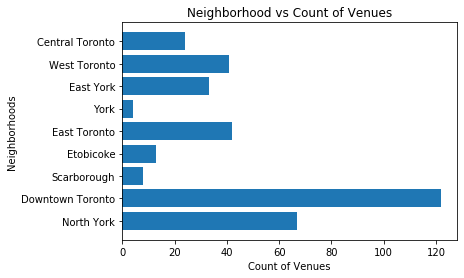

In [153]:
plt.barh(toronto_df['Borough'],toronto_df['Venue Count'])
plt.title('Neighborhood vs Count of Venues')
plt.xlabel('Count of Venues')
plt.ylabel('Neighborhoods')
plt.show()

Text(0, 0.5, 'Count of Venues')

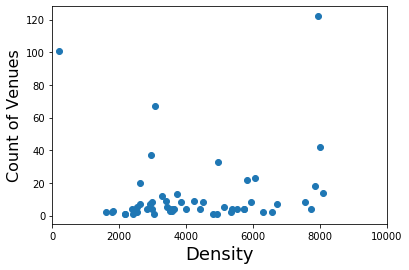

In [159]:
plt.scatter(toronto_df['Density'],toronto_df['Venue Count'])
plt.xlim(0,10000,10000)
plt.xlabel('Density', fontsize=18)
plt.ylabel('Count of Venues', fontsize=16)

Text(0, 0.5, 'Count of Venues')

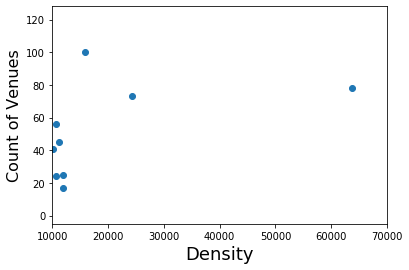

In [161]:
plt.scatter(toronto_df['Density'],toronto_df['Venue Count'])
plt.xlim(10000,70000)
plt.xlabel('Density', fontsize=18)
plt.ylabel('Count of Venues', fontsize=16)

In [114]:
col = ['Neighborhood','Density','Venue Count']

In [115]:
toronto_cluster = toronto_df[col]

## Determining best value for k

In [123]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

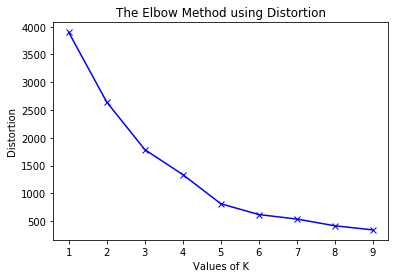

In [124]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

## Applying clustering algorithm

In [125]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_cluster.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_.shape

(63,)

In [126]:
kmeans.labels_

array([3, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0,
       2, 3, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3,
       0, 2, 3, 0, 0, 0, 3, 2, 3, 3, 2, 0, 0, 0, 0, 3, 0, 4, 0])

In [105]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

In [121]:
X = toronto_grouped_clustering.values

In [131]:
toronto_merged = toronto_df.copy()

# add clustering labels
toronto_merged.insert(11, 'Cluster Labels', kmeans.labels_)

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude,Venue,Venue Category,Venue Count,Cluster Labels
0,M3A,North York,Parkwoods,4.960366,26533,5349,43.753259,-79.329656,"Variety Store, Brookbanks Park","Food & Drink Shop, Park",2,3
1,M4A,North York,Victoria Village,4.719546,17047,3612,43.725882,-79.315572,"Pizza Nova, Portugril, Tim Hortons, Victoria V...","Pizza Place, Portuguese Restaurant, Coffee Sho...",4,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",2.196988,24755,11267,43.654260,-79.360636,"GW General, FUEL+, Residence & Conference Cent...","Antique Shop, Coffee Shop, Hotel, Beer Store, ...",45,2
3,M6A,North York,"Lawrence Manor, Lawrence Heights",5.339568,17519,3280,43.718518,-79.464763,"Party City, Fairweather, International Clothie...","Miscellaneous Shop, Women's Store, Clothing St...",12,0
4,M1B,Scarborough,"Malvern, Rouge",37.587676,67048,1783,43.806686,-79.194353,"Interprovincial Group, Wendy’s","Print Shop, Fast Food Restaurant",2,0


## Plotting the clustered neighborhood in the map using Folium

In [133]:
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="map.png alt='Map'">

## Visulazing clustered analysis

Text(0, 0.5, 'Count of Venues')

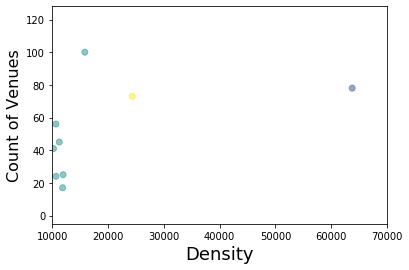

In [163]:
plt.scatter(toronto_merged['Density'],toronto_merged['Venue Count'],c=toronto_merged['Cluster Labels'].astype(np.float), alpha=0.5)
plt.xlim(10000,70000)
plt.xlabel('Density', fontsize=18)
plt.ylabel('Count of Venues', fontsize=16)

Text(0, 0.5, 'Count of Venues')

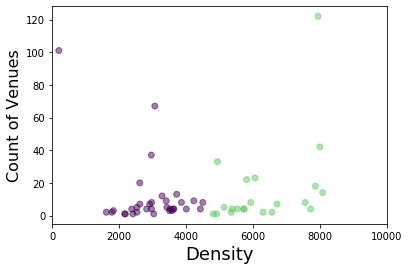

In [164]:
plt.scatter(toronto_merged['Density'],toronto_merged['Venue Count'],c=toronto_merged['Cluster Labels'].astype(np.float), alpha=0.5)
plt.xlim(0,10000)
plt.xlabel('Density', fontsize=18)
plt.ylabel('Count of Venues', fontsize=16)

## Thanks for reviewing :)